In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

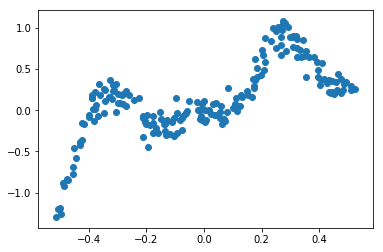

In [3]:
plt.scatter(x, y)

In [4]:
xx = np.linspace(min(x), max(x), num=200)

In [5]:
x_data = x.reshape(-1,1)
y_data = y.reshape(-1,1)

In [10]:
import mylibrary.nnlib as tnn

In [22]:
optimizer = tnn.Adam()
la1 = tnn.NonLinearLayer(1, 3, activation=tnn.LeakyRelu(), optimizer=optimizer)
la2 = tnn.LinearLayer(3, 1,
                      weights=np.zeros((3,1)),
                      bias=np.zeros(1),
                      optimizer=optimizer)
resblock = tnn.AutoForm()
resblock.collect_global_layers()


%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    resout = resblock.forward(x_data)
    a1 = resout+x_data
    
    loss = tnn.MseLoss.loss(a1, y_data)
    dy = tnn.MseLoss.del_loss(a1, y_data)
    
    
    dx = resblock.backward(dy)
    
    resblock.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.06014204817529855

_______________________
epoch 10
Loss 0.050480349683033825

_______________________
epoch 20
Loss 0.05059906051929275

_______________________
epoch 30
Loss 0.050304829742802024

_______________________
epoch 40
Loss 0.05017497780186159

_______________________
epoch 50
Loss 0.05015771911458989

_______________________
epoch 60
Loss 0.0501276119248146

_______________________
epoch 70
Loss 0.050124083835029865

_______________________
epoch 80
Loss 0.050121174704217834

_______________________
epoch 90
Loss 0.05011920916190597

_______________________
epoch 100
Loss 0.05011869610265575

_______________________
epoch 110
Loss 0.0501184641550389

_______________________
epoch 120
Loss 0.050118308867395954

_______________________
epoch 130
Loss 0.05011823567326663

_______________________
epoch 140
Loss 0.050118176798838426

_______________________
epoch 150
Loss 0.0501180924029798

_______________________
epoch 160
Loss 0.0501179


_______________________
epoch 1360
Loss 0.02732622023684829

_______________________
epoch 1370
Loss 0.027327969969119265

_______________________
epoch 1380
Loss 0.027325921284238386

_______________________
epoch 1390
Loss 0.027326061937322302

_______________________
epoch 1400
Loss 0.027325157277988607

_______________________
epoch 1410
Loss 0.027327023318174555

_______________________
epoch 1420
Loss 0.027326691691061472

_______________________
epoch 1430
Loss 0.02732600305889621

_______________________
epoch 1440
Loss 0.027327423820568675

_______________________
epoch 1450
Loss 0.027325036075176577

_______________________
epoch 1460
Loss 0.02732577492652549

_______________________
epoch 1470
Loss 0.027326045159935187

_______________________
epoch 1480
Loss 0.027327056420521544

_______________________
epoch 1490
Loss 0.027326753800971933

_______________________
epoch 1500
Loss 0.027325448768280705

_______________________
epoch 1510
Loss 0.027326712053070988

__________


_______________________
epoch 2700
Loss 0.027327739757648198

_______________________
epoch 2710
Loss 0.02732790364753481

_______________________
epoch 2720
Loss 0.027328489504162997

_______________________
epoch 2730
Loss 0.02732483244729191

_______________________
epoch 2740
Loss 0.02732554413347859

_______________________
epoch 2750
Loss 0.02732561568315317

_______________________
epoch 2760
Loss 0.027325101141427995

_______________________
epoch 2770
Loss 0.02732514443673446

_______________________
epoch 2780
Loss 0.027325670738758592

_______________________
epoch 2790
Loss 0.027336200290432138

_______________________
epoch 2800
Loss 0.027337526938457833

_______________________
epoch 2810
Loss 0.027329677760031146

_______________________
epoch 2820
Loss 0.027326077392064003

_______________________
epoch 2830
Loss 0.027325298986182685

_______________________
epoch 2840
Loss 0.02732709299841606

_______________________
epoch 2850
Loss 0.027326420957042904

_____________


_______________________
epoch 4030
Loss 0.027328794819400967

_______________________
epoch 4040
Loss 0.027324974243652624

_______________________
epoch 4050
Loss 0.027326397567828762

_______________________
epoch 4060
Loss 0.027327019827567495

_______________________
epoch 4070
Loss 0.027325564112608808

_______________________
epoch 4080
Loss 0.027327280014447668

_______________________
epoch 4090
Loss 0.02732481400483948

_______________________
epoch 4100
Loss 0.027329001989434765

_______________________
epoch 4110
Loss 0.027325680511994105

_______________________
epoch 4120
Loss 0.02732575606069604

_______________________
epoch 4130
Loss 0.027327944547038064

_______________________
epoch 4140
Loss 0.02732528806672008

_______________________
epoch 4150
Loss 0.02732758497993886

_______________________
epoch 4160
Loss 0.027325223428571136

_______________________
epoch 4170
Loss 0.027326687451409867

_______________________
epoch 4180
Loss 0.027327008620108874

___________


_______________________
epoch 5370
Loss 0.02732690375459768

_______________________
epoch 5380
Loss 0.0273250329758722

_______________________
epoch 5390
Loss 0.027328918280569426

_______________________
epoch 5400
Loss 0.02732497613450998

_______________________
epoch 5410
Loss 0.027326366926246664

_______________________
epoch 5420
Loss 0.02732704363828441

_______________________
epoch 5430
Loss 0.02732566154058719

_______________________
epoch 5440
Loss 0.027327219064349588

_______________________
epoch 5450
Loss 0.027324807046552442

_______________________
epoch 5460
Loss 0.027329151054626185

_______________________
epoch 5470
Loss 0.027325640851300737

_______________________
epoch 5480
Loss 0.02732574415634454

_______________________
epoch 5490
Loss 0.027328005469184295

_______________________
epoch 5500
Loss 0.027325326593500385

_______________________
epoch 5510
Loss 0.027327525695453533

_______________________
epoch 5520
Loss 0.027325238672025583

______________

TclError: this isn't a Tk application

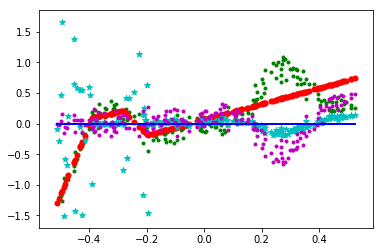

In [23]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)

In [26]:
optimizer = tnn.Adam()
la1 = tnn.NonLinearLayer(1, 3, activation=tnn.LeakyRelu(), optimizer=optimizer)
la2 = tnn.LinearLayer(3, 1,
                      weights=np.zeros((3,1)),
                      bias=np.zeros(1),
                      optimizer=optimizer)
net1 = tnn.AutoForm()
net1.collect_global_layers()


%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    a1 = net1.forward(x_data)
    
    loss = tnn.MseLoss.loss(a1, y_data)
    dy = tnn.MseLoss.del_loss(a1, y_data)
    
    dx = net1.backward(dy)
    
    net1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.10581899607597604

_______________________
epoch 10
Loss 0.08705255678383468

_______________________
epoch 20
Loss 0.07453083981989589

_______________________
epoch 30
Loss 0.061175119941354106

_______________________
epoch 40
Loss 0.052990161802498326

_______________________
epoch 50
Loss 0.051835976195305646

_______________________
epoch 60
Loss 0.05148543658600523

_______________________
epoch 70
Loss 0.05100513035614331

_______________________
epoch 80
Loss 0.05093976553859189

_______________________
epoch 90
Loss 0.0508248898176355

_______________________
epoch 100
Loss 0.050759995901122075

_______________________
epoch 110
Loss 0.05069290565965009

_______________________
epoch 120
Loss 0.050632569034439835

_______________________
epoch 130
Loss 0.050577128248760185

_______________________
epoch 140
Loss 0.05052756229099565

_______________________
epoch 150
Loss 0.05048286183808883

_______________________
epoch 160
Loss 0.05044


_______________________
epoch 1360
Loss 0.029891642804918926

_______________________
epoch 1370
Loss 0.029902472714631728

_______________________
epoch 1380
Loss 0.029879272105562737

_______________________
epoch 1390
Loss 0.029872907559469874

_______________________
epoch 1400
Loss 0.02986691309081192

_______________________
epoch 1410
Loss 0.029861843154176726

_______________________
epoch 1420
Loss 0.029857896221492333

_______________________
epoch 1430
Loss 0.029853119492643344

_______________________
epoch 1440
Loss 0.02984988680201439

_______________________
epoch 1450
Loss 0.029851535971031375

_______________________
epoch 1460
Loss 0.02985519988489985

_______________________
epoch 1470
Loss 0.02984473008904193

_______________________
epoch 1480
Loss 0.029837618003673076

_______________________
epoch 1490
Loss 0.029833361286296798

_______________________
epoch 1500
Loss 0.029831342969315538

_______________________
epoch 1510
Loss 0.029829386017655942

___________


_______________________
epoch 2710
Loss 0.029790346726652765

_______________________
epoch 2720
Loss 0.02978592179065598

_______________________
epoch 2730
Loss 0.029788977788625867

_______________________
epoch 2740
Loss 0.02979031989904839

_______________________
epoch 2750
Loss 0.029786193788157393

_______________________
epoch 2760
Loss 0.02979064424083877

_______________________
epoch 2770
Loss 0.0297858818892068

_______________________
epoch 2780
Loss 0.029790724866235414

_______________________
epoch 2790
Loss 0.029788369395427696

_______________________
epoch 2800
Loss 0.029785658670873207

_______________________
epoch 2810
Loss 0.029792291663639947

_______________________
epoch 2820
Loss 0.029785662074427913

_______________________
epoch 2830
Loss 0.029790643324866913


TclError: this isn't a Tk application

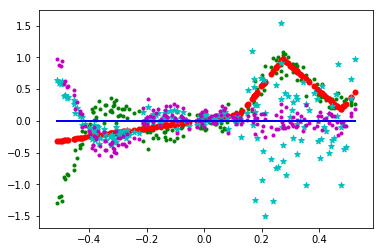

In [27]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)